## TEAM - 15
## TEAM members:   Shraddha (smedurik) and Uma Maheswara Reddy(usannapu)


In [27]:
pip install gymnasium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install gym

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gymnasium
import pandas as pd
from gymnasium import spaces
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

Step 1
State: [0, 0]
Action: Up
Reward: -1
Total Reward: -1
Done: False


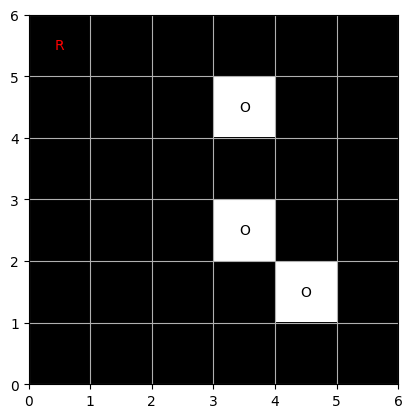

Step 2
State: [0, 0]
Action: Drop-off
Reward: -1
Total Reward: -2
Done: False


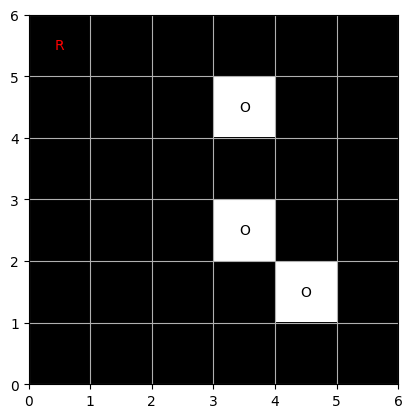

Step 3
State: [1, 0]
Action: Down
Reward: -1
Total Reward: -3
Done: False


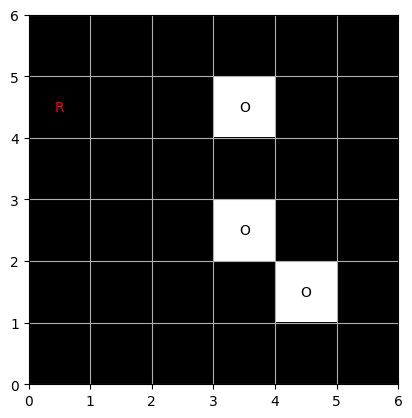

Step 4
State: [1, 1]
Action: Right
Reward: -1
Total Reward: -4
Done: False


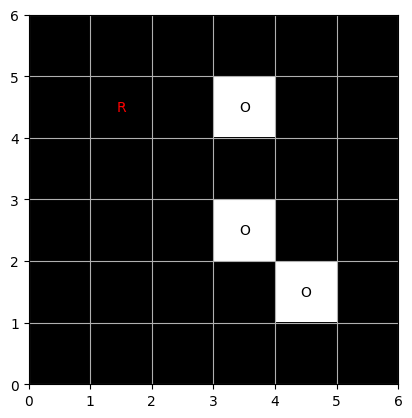

Step 5
State: [1, 0]
Action: Left
Reward: -1
Total Reward: -5
Done: False


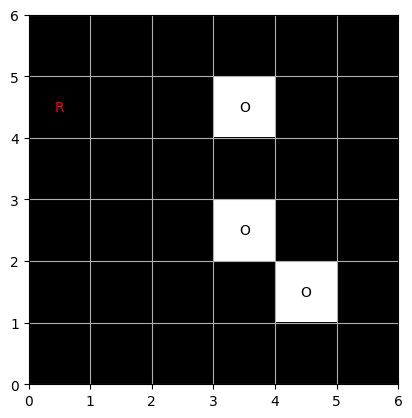

Step 6
State: [2, 0]
Action: Down
Reward: -1
Total Reward: -6
Done: False


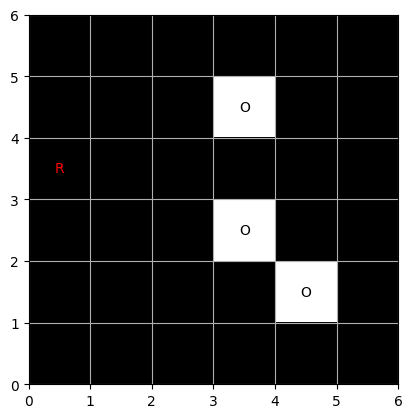

Step 7
State: [2, 0]
Action: Left
Reward: -1
Total Reward: -7
Done: False


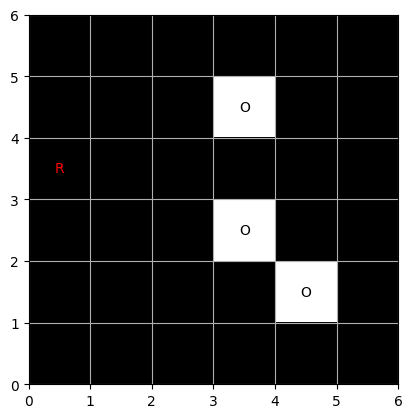

Step 8
State: [1, 0]
Action: Up
Reward: -1
Total Reward: -8
Done: False


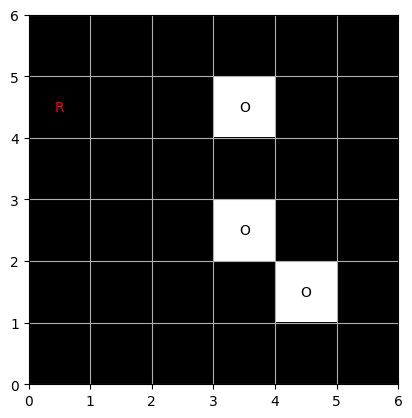

Step 9
State: [1, 0]
Action: Left
Reward: -1
Total Reward: -9
Done: False


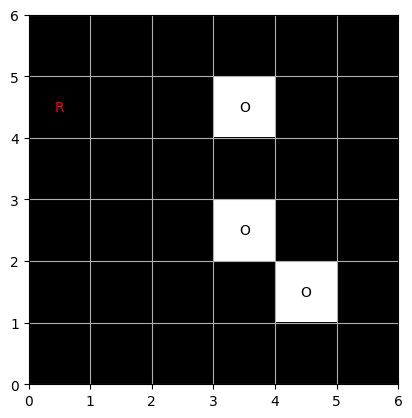

Step 10
State: [0, 0]
Action: Up
Reward: -1
Total Reward: -10
Done: False


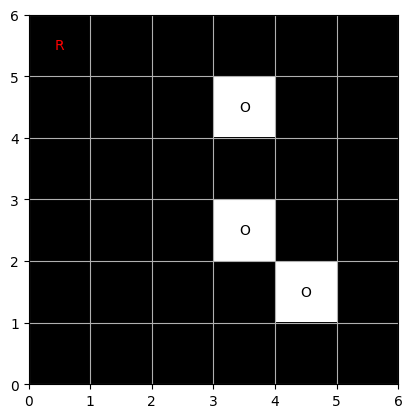

In [3]:


class daenv_deter:
    def __init__(self):
        self.g_size = 6
        self.grid = np.zeros((self.g_size, self.g_size))
        self.rob_pos = [0, 0]
        self.pick_pos = [2, 3]
        self.drop_pos = [5, 5]
        self.obs = [(1, 3), (3, 3), (4, 4)]
        self.carry_item = False
        self.total_steps = 0
        self.total_reward = 0
        self.done = False
        self.action_full = ["Up", "Down", "Left", "Right", "Pickup", "Drop-off"]
        self.reset()

        for obst in self.obs:
            self.grid[obst] = -1

    def reset(self):
        self.rob_pos = [0, 0]
        self.carry_item = False
        self.total_steps = 0
        self.total_reward = 0
        self.done = False
        return self.rob_pos, self.carry_item
    
    def step(self, action):
        x, y = self.rob_pos
        reward = -1

        if action == "Up":
            x = max(0, x - 1)
        elif action == "Down":
            x = min(self.g_size - 1, x + 1)
        elif action == "Left":
            y = max(0, y - 1)
        elif action == "Right":
            y = min(self.g_size - 1, y + 1)
        elif action == "Pickup" and self.rob_pos == self.pick_pos:
            self.carry_item = True
        elif action == "Drop-off" and self.rob_pos == self.drop_pos and self.carry_item:
            reward = 20
            self.done = True

        if (x, y) in self.obs:
            reward = -20
            self.done = True

        self.rob_pos = [x, y]
        self.total_steps += 1
        self.total_reward += reward

        return self.rob_pos, reward, self.done, {}

    def random_action(self):
        return random.choice(self.action_full)
    
    def render(self):
        grid = np.zeros((self.g_size, self.g_size), dtype=str)
        grid.fill(".")
        grid[self.rob_pos[0], self.rob_pos[1]] = "R"
        grid[self.pick_pos[0], self.pick_pos[1]] = "P"
        grid[self.drop_pos[0], self.drop_pos[1]] = "D"

        for obst in self.obs:
            grid[obst] = "O"

        plt.imshow(grid == "O", cmap="gray", extent=(0, self.g_size, 0, self.g_size))
        for i in range(self.g_size):
            for j in range(self.g_size):
                text = grid[i, j]
                plt.text(j + 0.5, self.g_size - i - 0.5, text, ha="center", va="center",
                         color="red" if text == "R" else "black")
        plt.xticks(np.arange(0, self.g_size + 1, 1))
        plt.yticks(np.arange(0, self.g_size + 1, 1))
        plt.grid(True)
        plt.show()


environ = daenv_deter()
state, carrying = environ.reset()

for step in range(10):
    action = environ.random_action()
    next_state, reward, done, _ = environ.step(action)

    print(f"Step {step + 1}")
    print(f"State: {next_state}")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Total Reward: {environ.total_reward}")
    print(f"Done: {done}")
    environ.render()

    if done:
        break

Episode: 1, Reward: -118, Epsilon: 0.995
Episode: 2, Reward: -34, Epsilon: 0.990025
Episode: 3, Reward: -78, Epsilon: 0.985074875
Episode: 4, Reward: -26, Epsilon: 0.9801495006250001
Episode: 5, Reward: -32, Epsilon: 0.9752487531218751
Episode: 6, Reward: -62, Epsilon: 0.9703725093562657
Episode: 7, Reward: -84, Epsilon: 0.9655206468094844
Episode: 8, Reward: -57, Epsilon: 0.960693043575437
Episode: 9, Reward: -82, Epsilon: 0.9558895783575597
Episode: 10, Reward: -40, Epsilon: 0.9511101304657719
Episode: 11, Reward: -68, Epsilon: 0.946354579813443
Episode: 12, Reward: -94, Epsilon: 0.9416228069143757
Episode: 13, Reward: -29, Epsilon: 0.9369146928798039
Episode: 14, Reward: -32, Epsilon: 0.9322301194154049
Episode: 15, Reward: -87, Epsilon: 0.9275689688183278
Episode: 16, Reward: -65, Epsilon: 0.9229311239742362
Episode: 17, Reward: -94, Epsilon: 0.918316468354365
Episode: 18, Reward: -52, Epsilon: 0.9137248860125932
Episode: 19, Reward: -44, Epsilon: 0.9091562615825302
Episode: 20, Re

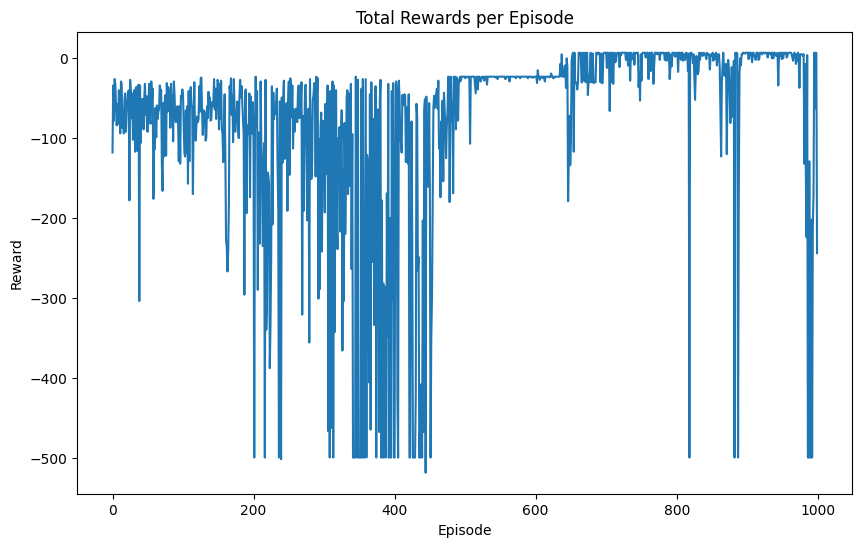

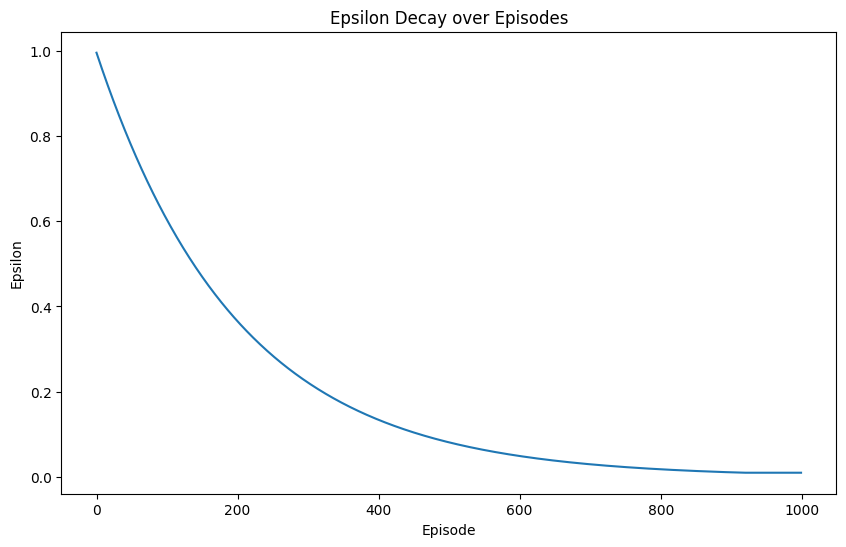

In [43]:

class DQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),  # Layer 1
            nn.ReLU(),                  # Activation
            nn.Linear(128, 256),        # Layer 2
            nn.ReLU(),                  # Activation
            nn.Linear(256, output_dim)  # Output layer
        )

    def forward(self, state):
        return self.fc(state)

# Experience Replay Buffer
class ExperienceReplay:
    def __init__(self, buffer_capacity):
        self.buffer = deque(maxlen=buffer_capacity)

    def store(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

# Convert the state from [rob_pos, carry_item] to a 3-dimensional vector
def flatten_state(rob_pos, carry_item):
    return np.array([rob_pos[0], rob_pos[1], int(carry_item)])

# Hyperparameters
STATE_DIM = 3  # [x, y, carry_item]
ACTION_DIM = 6  # ["Up", "Down", "Left", "Right", "Pickup", "Drop-off"]
BUFFER_SIZE = 10000
BATCH_SIZE = 32
DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.001
TARGET_UPDATE_FREQUENCY = 10
TOTAL_EPISODES = 1000
EPSILON_START = 1.0
EPSILON_DECAY = 0.995
EPSILON_MIN = 0.01
MAX_STEPS = 500

# Training the DQN
def train_dqn(env, online_q_network, target_q_network, replay_buffer, optimizer, total_episodes, batch_size, gamma, epsilon_start, epsilon_decay, epsilon_min, target_update_freq, max_steps):
    epsilon = epsilon_start
    episode_rewards = []
    epsilon_history = []

    for episode in range(total_episodes):
        state, carry_item = env.reset()
        state = flatten_state(state, carry_item)  # Flatten the state

        episode_reward = 0

        for step in range(max_steps):
            if np.random.rand() < epsilon:
                action = random.choice(range(ACTION_DIM))  # Random action
            else:
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                with torch.no_grad():
                    q_values = online_q_network(state_tensor)
                    action = torch.argmax(q_values).item()

            next_state, reward, done, _ = env.step(env.action_full[action])
            next_state = flatten_state(next_state, env.carry_item)  # Flatten the next state

            episode_reward += reward

            replay_buffer.store(state, action, reward, next_state, done)

            state = next_state

            if len(replay_buffer) >= batch_size:
                states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

                states_tensor = torch.FloatTensor(states)
                actions_tensor = torch.LongTensor(actions).unsqueeze(1)
                rewards_tensor = torch.FloatTensor(rewards).unsqueeze(1)
                next_states_tensor = torch.FloatTensor(next_states)
                dones_tensor = torch.FloatTensor(dones).unsqueeze(1)

                current_q_values = online_q_network(states_tensor).gather(1, actions_tensor)

                with torch.no_grad():
                    max_next_q_values = target_q_network(next_states_tensor).max(1)[0].unsqueeze(1)
                    target_q_values = rewards_tensor + gamma * max_next_q_values * (1 - dones_tensor)

                loss = nn.MSELoss()(current_q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if done:
                break

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        episode_rewards.append(episode_reward)
        epsilon_history.append(epsilon)

        if episode % target_update_freq == 0:
            target_q_network.load_state_dict(online_q_network.state_dict())

        print(f"Episode: {episode + 1}, Reward: {episode_reward}, Epsilon: {epsilon}")

    return episode_rewards, epsilon_history

# Plot the rewards and epsilon decay
def plot_metrics(rewards, epsilon_values):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.title('Epsilon Decay over Episodes')
    plt.show()

# Main function to train the DQN with your custom environment
if __name__ == "__main__":
    env = daenv_deter()  # Use your custom environment

    online_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network.load_state_dict(online_q_network.state_dict())

    replay_buffer = ExperienceReplay(BUFFER_SIZE)
    optimizer = optim.Adam(online_q_network.parameters(), lr=LEARNING_RATE)

    rewards, epsilon_values = train_dqn(
        env,
        online_q_network,
        target_q_network,
        replay_buffer,
        optimizer,
        TOTAL_EPISODES,
        BATCH_SIZE,
        DISCOUNT_FACTOR,
        EPSILON_START,
        EPSILON_DECAY,
        EPSILON_MIN,
        TARGET_UPDATE_FREQUENCY,
        MAX_STEPS
    )

    plot_metrics(rewards, epsilon_values)

    # Save the trained model
    with open('smedurik_usannapu_assignment2_part2_dqn_warehouserobot.pkl', 'wb') as f:
        pickle.dump(online_q_network.state_dict(), f)


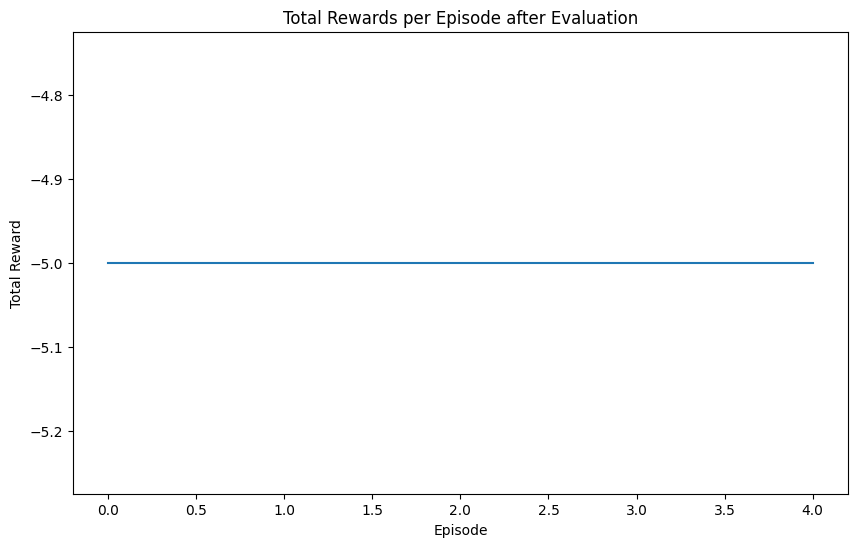

Average Reward over 5 episodes: -5.00


In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
import pickle

# Assuming DQNetwork and daenv_deter classes are already defined

def flatten_state(rob_pos, carry_item):
    return np.array([rob_pos[0], rob_pos[1], int(carry_item)])

# Load the trained model weights
model_for_eval = DQNetwork(STATE_DIM, ACTION_DIM)
with open('smedurik_usannapu_assignment2_part2_dqn_warehouserobot.pkl', 'rb') as f:
    model_weights = pickle.load(f)
model_for_eval.load_state_dict(model_weights)
model_for_eval.eval()

# Evaluation parameters
eval_episodes = 5
eval_rewards = []
max_steps_per_episode = 5

# Evaluate the model
env = daenv_deter()
for episode in range(eval_episodes):
    state, carry_item = env.reset()
    state = flatten_state(state, carry_item)
    episode_reward = 0

    for step in range(max_steps_per_episode):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = model_for_eval(state_tensor)
            action = torch.argmax(q_values).item()

        next_state, reward, done, _ = env.step(env.action_full[action])
        next_state = flatten_state(next_state, env.carry_item)

        state = next_state
        episode_reward += reward

        if done:
            break

    eval_rewards.append(episode_reward)

# Plotting total rewards per episode graph after evaluation
plt.figure(figsize=(10, 6))
plt.plot(eval_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode after Evaluation')
plt.show()

avg_reward = np.mean(eval_rewards)
print(f"Average Reward over {eval_episodes} episodes: {avg_reward:.2f}")

## PART 2.2 CARTPOLE - V1

In [4]:
import gym
from gym import spaces
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import pickle
from collections import deque
import random

Episode: 1, Reward: 20.0, Epsilon: 0.995
Episode: 2, Reward: 12.0, Epsilon: 0.990025
Episode: 3, Reward: 32.0, Epsilon: 0.985074875
Episode: 4, Reward: 19.0, Epsilon: 0.9801495006250001
Episode: 5, Reward: 42.0, Epsilon: 0.9752487531218751
Episode: 6, Reward: 15.0, Epsilon: 0.9703725093562657
Episode: 7, Reward: 22.0, Epsilon: 0.9655206468094844
Episode: 8, Reward: 14.0, Epsilon: 0.960693043575437
Episode: 9, Reward: 16.0, Epsilon: 0.9558895783575597
Episode: 10, Reward: 26.0, Epsilon: 0.9511101304657719
Episode: 11, Reward: 15.0, Epsilon: 0.946354579813443
Episode: 12, Reward: 28.0, Epsilon: 0.9416228069143757
Episode: 13, Reward: 25.0, Epsilon: 0.9369146928798039
Episode: 14, Reward: 15.0, Epsilon: 0.9322301194154049
Episode: 15, Reward: 13.0, Epsilon: 0.9275689688183278
Episode: 16, Reward: 20.0, Epsilon: 0.9229311239742362
Episode: 17, Reward: 11.0, Epsilon: 0.918316468354365
Episode: 18, Reward: 9.0, Epsilon: 0.9137248860125932
Episode: 19, Reward: 14.0, Epsilon: 0.909156261582530

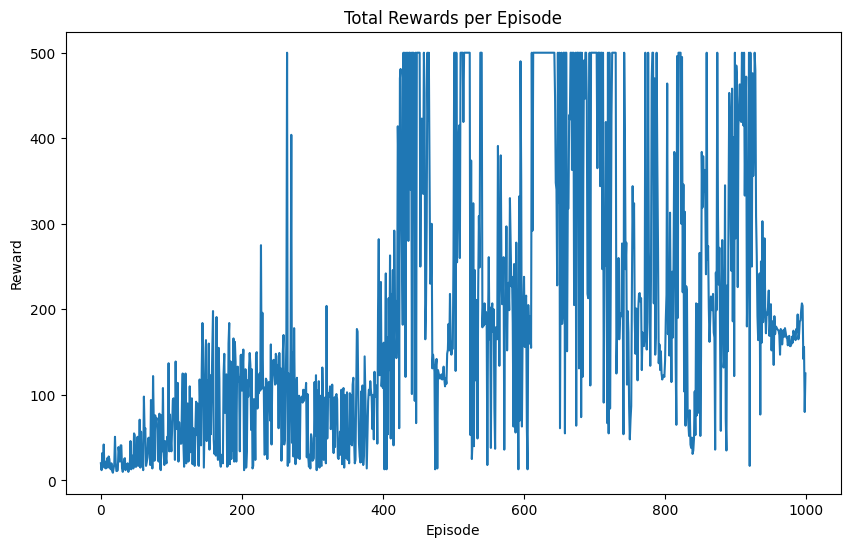

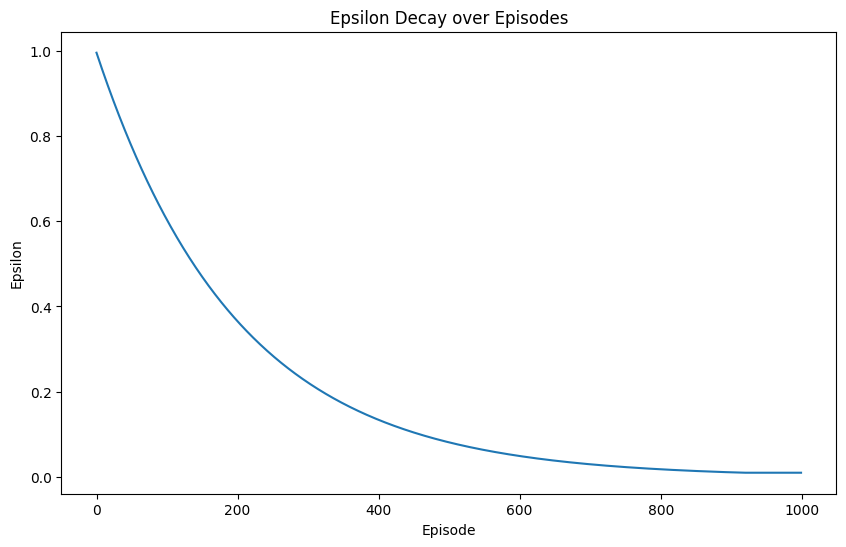

In [9]:


# Define the DQNetwork architecture
class DQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),  # Layer 1
            nn.ReLU(),                  # Activation
            nn.Linear(128, 256),        # Layer 2
            nn.ReLU(),                  # Activation
            nn.Linear(256, output_dim)  # Output layer
        )

    def forward(self, state):
        return self.fc(state)

# Experience Replay Buffer
class ExperienceReplay:
    def __init__(self, buffer_capacity):
        self.buffer = deque(maxlen=buffer_capacity)

    def store(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

# Hyperparameters
STATE_DIM = 4
ACTION_DIM = 2
BUFFER_SIZE = 10000
BATCH_SIZE = 64
DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.001
TARGET_UPDATE_FREQUENCY = 10
TOTAL_EPISODES = 1000
EPSILON_START = 1.0
EPSILON_DECAY = 0.995
EPSILON_MIN = 0.01
MAX_STEPS = 500

def train_dqn(env, online_q_network, target_q_network, replay_buffer, optimizer, total_episodes, batch_size, gamma, epsilon_start, epsilon_decay, epsilon_min, target_update_freq, max_steps):
    epsilon = epsilon_start
    episode_rewards = []
    epsilon_history = []

    for episode in range(total_episodes):
        state, _ = env.reset()
        episode_reward = 0

        for step in range(max_steps):
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                with torch.no_grad():
                    q_values = online_q_network(state_tensor)
                    action = torch.argmax(q_values).item()

            next_state, reward, done, _, _ = env.step(action)
            episode_reward += reward

            replay_buffer.store(state, action, reward, next_state, done)

            state = next_state

            if len(replay_buffer) >= batch_size:
                states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

                states_tensor = torch.FloatTensor(states)
                actions_tensor = torch.LongTensor(actions).unsqueeze(1)
                rewards_tensor = torch.FloatTensor(rewards).unsqueeze(1)
                next_states_tensor = torch.FloatTensor(next_states)
                dones_tensor = torch.FloatTensor(dones).unsqueeze(1)

                current_q_values = online_q_network(states_tensor).gather(1, actions_tensor)

                with torch.no_grad():
                    max_next_q_values = target_q_network(next_states_tensor).max(1)[0].unsqueeze(1)
                    target_q_values = rewards_tensor + gamma * max_next_q_values * (1 - dones_tensor)

                loss = nn.MSELoss()(current_q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if done:
                break

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        episode_rewards.append(episode_reward)
        epsilon_history.append(epsilon)

        if episode % target_update_freq == 0:
            target_q_network.load_state_dict(online_q_network.state_dict())

        print(f"Episode: {episode + 1}, Reward: {episode_reward}, Epsilon: {epsilon}")

    return episode_rewards, epsilon_history

def plot_metrics(rewards, epsilon_values):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.title('Epsilon Decay over Episodes')
    plt.show()

if __name__ == "__main__":
    env = gym.make('CartPole-v1')

    online_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network.load_state_dict(online_q_network.state_dict())

    replay_buffer = ExperienceReplay(BUFFER_SIZE)
    optimizer = optim.Adam(online_q_network.parameters(), lr=LEARNING_RATE)

    rewards, epsilon_values = train_dqn(
        env,
        online_q_network,
        target_q_network,
        replay_buffer,
        optimizer,
        TOTAL_EPISODES,
        BATCH_SIZE,
        DISCOUNT_FACTOR,
        EPSILON_START,
        EPSILON_DECAY,
        EPSILON_MIN,
        TARGET_UPDATE_FREQUENCY,
        MAX_STEPS
    )

    plot_metrics(rewards, epsilon_values)

    # Save the trained model
    with open('smedurik_usannapu_assignment2_part2_dqn_cartpole.pkl', 'wb') as f:
        pickle.dump(online_q_network.state_dict(), f)

    


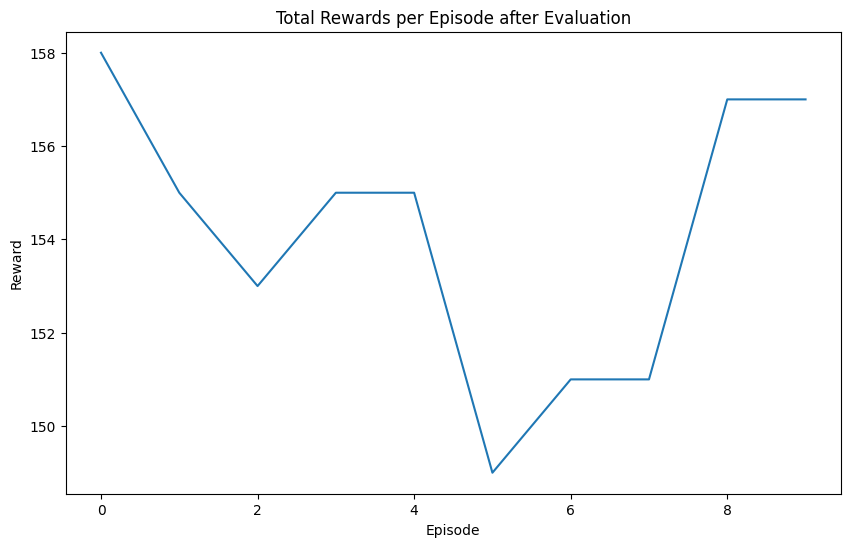


Average Reward over 10 Evaluation Episodes: 154.10


In [15]:
model_for_eval = DQNetwork(STATE_DIM, ACTION_DIM)
with open('smedurik_usannapu_assignment2_part2_dqn_cartpole.pkl', 'rb') as f:
    model_weights = pickle.load(f)
    model_for_eval.load_state_dict(model_weights)
    model_for_eval.eval()

    # Evaluate the model
    num_eval_episodes = 10
    eval_rewards = []

    for episode in range(num_eval_episodes):
        state, _ = env.reset()
        episode_reward = 0

        while True:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = model_for_eval(state_tensor)
                action = torch.argmax(q_values).item()

            next_state, reward, done, _, _ = env.step(action)
            episode_reward += reward
            state = next_state

            if done:
                break

        eval_rewards.append(episode_reward)

    # Plotting the Total Rewards per Episode after Evaluation
    plt.figure(figsize=(10, 6))
    plt.plot(eval_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode after Evaluation')
    plt.show()

    avg_reward = np.mean(eval_rewards)
    print(f"\nAverage Reward over {num_eval_episodes} Evaluation Episodes: {avg_reward:.2f}")

In [ ]:
##### Clif-Walking

Episode: 1, Reward: -11296, Epsilon Rate: 0.995
Episode: 2, Reward: -9316, Epsilon Rate: 0.990025
Episode: 3, Reward: -10603, Epsilon Rate: 0.985074875
Episode: 4, Reward: -11098, Epsilon Rate: 0.9801495006250001
Episode: 5, Reward: -8524, Epsilon Rate: 0.9752487531218751
Episode: 6, Reward: -1153, Epsilon Rate: 0.9703725093562657
Episode: 7, Reward: -6247, Epsilon Rate: 0.9655206468094844
Episode: 8, Reward: -10207, Epsilon Rate: 0.960693043575437
Episode: 9, Reward: -8963, Epsilon Rate: 0.9558895783575597
Episode: 10, Reward: -10207, Epsilon Rate: 0.9511101304657719
Episode: 11, Reward: -9217, Epsilon Rate: 0.946354579813443
Episode: 12, Reward: -10900, Epsilon Rate: 0.9416228069143757
Episode: 13, Reward: -10801, Epsilon Rate: 0.9369146928798039
Episode: 14, Reward: -7678, Epsilon Rate: 0.9322301194154049
Episode: 15, Reward: -8623, Epsilon Rate: 0.9275689688183278
Episode: 16, Reward: -9514, Epsilon Rate: 0.9229311239742362
Episode: 17, Reward: -8326, Epsilon Rate: 0.91831646835436

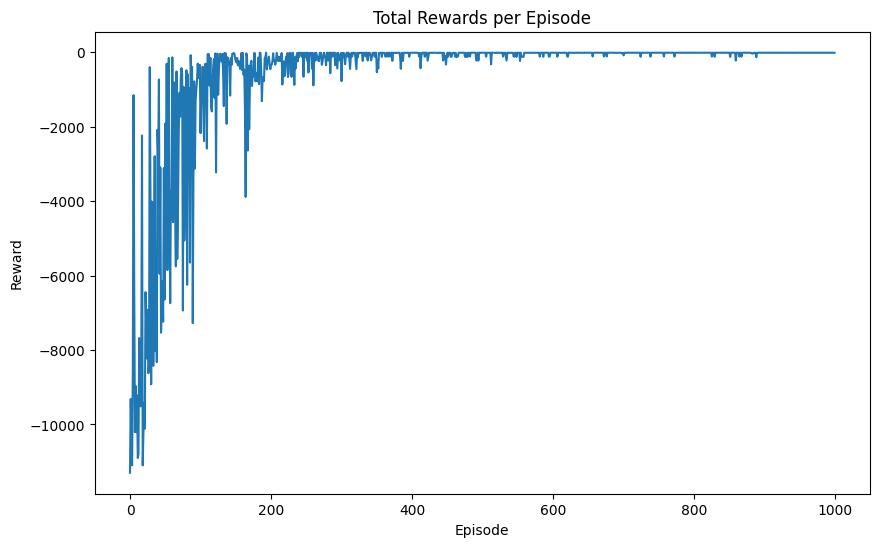

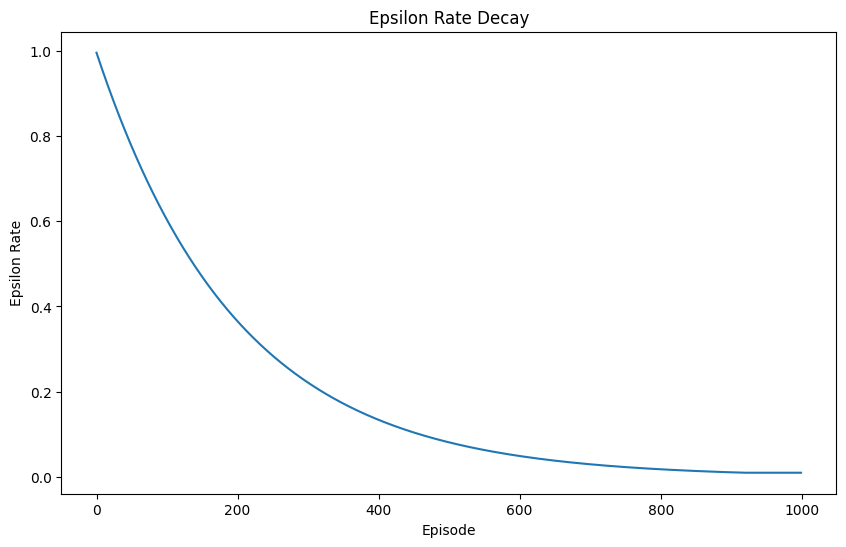

In [15]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import pickle

# Define the DQN architecture for CliffWalking
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Experience replay buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((
            np.array(state, dtype=np.float32),
            action,
            reward,
            np.array(next_state, dtype=np.float32),
            done
        ))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

# Hyperparameters
input_dim = 48  # CliffWalking has a 4x12 grid, so 48 states
output_dim = 4  # CliffWalking has 4 discrete actions: UP, DOWN, LEFT, RIGHT
replay_buffer_size = 50000
batch_size = 64
gamma = 0.95
learning_rate = 0.001
target_update_frequency = 10
num_episodes = 1000
initial_epsilon_rate = 1.0
epsilon_decay = 0.995
min_epsilon_rate = 0.01

# Convert state to a one-hot encoding
def one_hot_state(state, num_states=48):
    one_hot = np.zeros(num_states, dtype=np.float32)
    one_hot[state] = 1.0
    return one_hot

# Training function
def train_dqn(env, num_episodes, model, target_model, replay_buffer, optimizer, initial_epsilon_rate):
    rewards_list = []
    epsilon_rates = []
    epsilon_rate = initial_epsilon_rate

    for episode in range(num_episodes):
        state, _ = env.reset()  # Get initial state (discrete value)
        state = one_hot_state(state)  # Convert to one-hot encoding
        episode_reward = 0

        for step in range(1000):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon_rate:
                action = env.action_space.sample()
            else:
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                with torch.no_grad():
                    q_values = model(state_tensor)
                    action = torch.argmax(q_values).item()

            next_state, reward, done, _, _ = env.step(action)
            next_state = one_hot_state(next_state)  # Convert next_state to one-hot encoding
            episode_reward += reward

            replay_buffer.push(state, action, reward, next_state, done)
            state = next_state

            if len(replay_buffer) >= batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                batch_states_tensor = torch.FloatTensor(batch_states)
                batch_actions_tensor = torch.LongTensor(batch_actions).unsqueeze(1)
                batch_rewards_tensor = torch.FloatTensor(batch_rewards).unsqueeze(1)
                batch_next_states_tensor = torch.FloatTensor(batch_next_states)
                batch_dones_tensor = torch.FloatTensor(batch_dones).unsqueeze(1)

                q_values = model(batch_states_tensor).gather(1, batch_actions_tensor)

                with torch.no_grad():
                    next_q_values = target_model(batch_next_states_tensor).max(1)[0].unsqueeze(1)
                    target_q_values = batch_rewards_tensor + gamma * next_q_values * (1 - batch_dones_tensor)

                loss = nn.MSELoss()(q_values, target_q_values)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if done:
                break

        if episode % target_update_frequency == 0:
            target_model.load_state_dict(model.state_dict())

        # Update epsilon rate
        epsilon_rate = max(epsilon_rate * epsilon_decay, min_epsilon_rate)
        rewards_list.append(episode_reward)
        epsilon_rates.append(epsilon_rate)

        print(f"Episode: {episode + 1}, Reward: {episode_reward}, Epsilon Rate: {epsilon_rate}")

    return rewards_list, epsilon_rates

# Function to plot results
def plot_results(rewards_list, epsilon_rates):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_rates)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Rate')
    plt.title('Epsilon Rate Decay')
    plt.show()

if __name__ == "__main__":
    env = gym.make('CliffWalking-v0')

    model = DQN(input_dim, output_dim)
    target_model = DQN(input_dim, output_dim)
    target_model.load_state_dict(model.state_dict())

    replay_buffer = ReplayBuffer(replay_buffer_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    rewards_list, epsilon_rates = train_dqn(env, num_episodes, model, target_model, replay_buffer, optimizer, initial_epsilon_rate)

    # Plotting the results
    plot_results(rewards_list, epsilon_rates)

    # Save the model weights
    with open("smedurik_usannapu_assignment2_part2_dqn_cliffwalking.pkl", "wb") as f:
        pickle.dump(model.state_dict(), f)


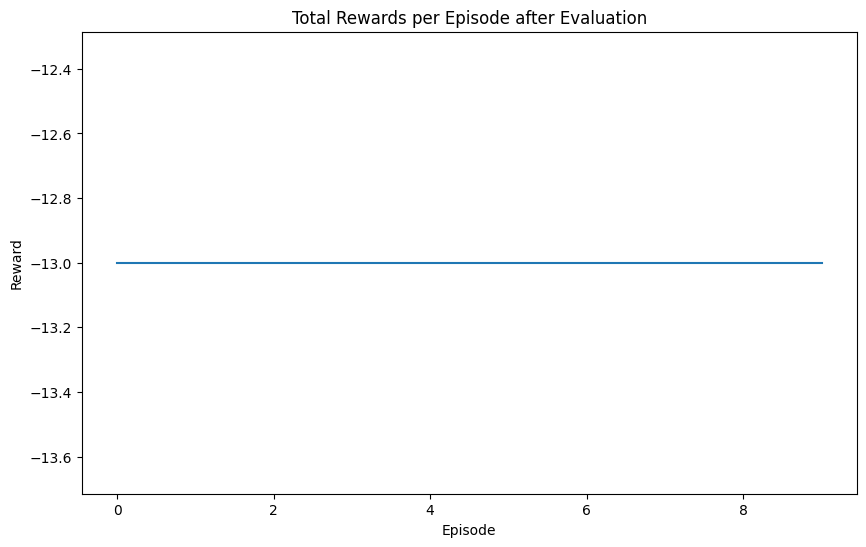


Average Reward over 10 Evaluation Episodes: -13.00


In [23]:

model_for_eval = DQN(input_dim, output_dim)


with open('smedurik_usannapu_assignment2_part2_dqn_cliffwalking.pkl', 'rb') as f:
    model_weights = pickle.load(f)
    model_for_eval.load_state_dict(model_weights)
    model_for_eval.eval()

num_eval_episodes = 10
eval_rewards = []

for episode in range(num_eval_episodes):
    state, _ = env.reset()
    state = one_hot_state(state)  
    episode_reward = 0

    while True:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = model_for_eval(state_tensor)
            action = torch.argmax(q_values).item()

        next_state, reward, done, _, _ = env.step(action)
        episode_reward += reward
        next_state = one_hot_state(next_state)  
        state = next_state

        if done:
            break

    eval_rewards.append(episode_reward)

plt.figure(figsize=(10, 6))
plt.plot(eval_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Total Rewards per Episode after Evaluation')
plt.show()

avg_reward = np.mean(eval_rewards)
print(f"\nAverage Reward over {num_eval_episodes} Evaluation Episodes: {avg_reward:.2f}")


## PART 2.2 CARTPOLE - V1

Episode: 1, Reward: 36.0, Epsilon: 0.995
Episode: 2, Reward: 36.0, Epsilon: 0.990025
Episode: 3, Reward: 16.0, Epsilon: 0.985074875
Episode: 4, Reward: 40.0, Epsilon: 0.9801495006250001
Episode: 5, Reward: 26.0, Epsilon: 0.9752487531218751
Episode: 6, Reward: 52.0, Epsilon: 0.9703725093562657
Episode: 7, Reward: 29.0, Epsilon: 0.9655206468094844
Episode: 8, Reward: 15.0, Epsilon: 0.960693043575437
Episode: 9, Reward: 15.0, Epsilon: 0.9558895783575597
Episode: 10, Reward: 10.0, Epsilon: 0.9511101304657719
Episode: 11, Reward: 13.0, Epsilon: 0.946354579813443
Episode: 12, Reward: 54.0, Epsilon: 0.9416228069143757
Episode: 13, Reward: 32.0, Epsilon: 0.9369146928798039
Episode: 14, Reward: 13.0, Epsilon: 0.9322301194154049
Episode: 15, Reward: 11.0, Epsilon: 0.9275689688183278
Episode: 16, Reward: 13.0, Epsilon: 0.9229311239742362
Episode: 17, Reward: 11.0, Epsilon: 0.918316468354365
Episode: 18, Reward: 15.0, Epsilon: 0.9137248860125932
Episode: 19, Reward: 19.0, Epsilon: 0.90915626158253

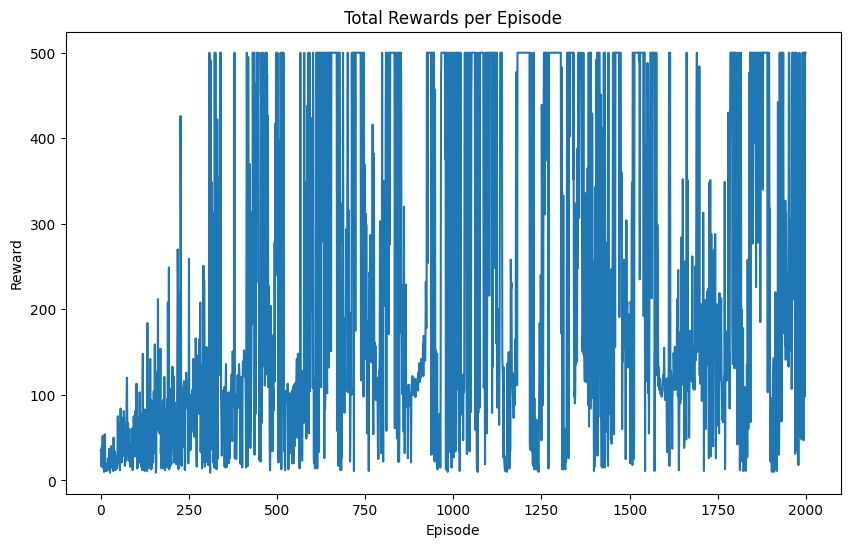

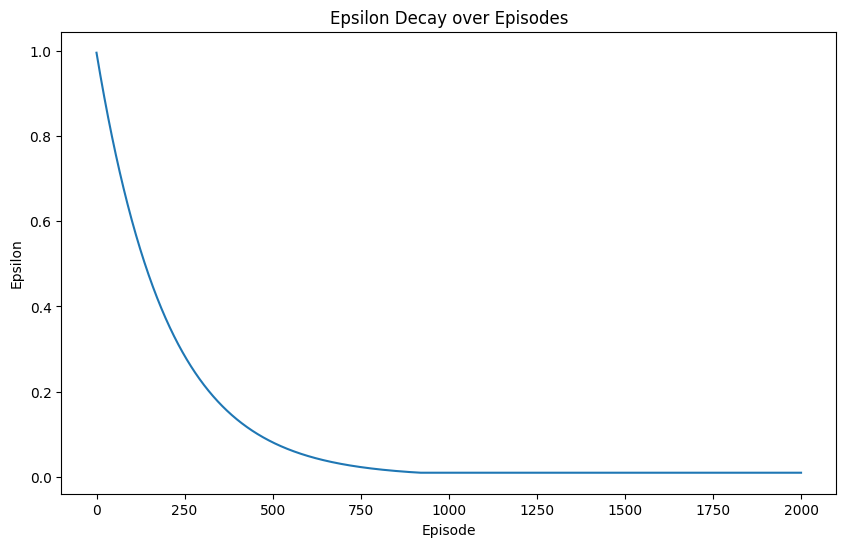

In [23]:
import numpy as np
import random
import pickle
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# Define the DQNetwork architecture
class DQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),  # Increased Layer 1
            nn.ReLU(),                  # Activation
            nn.Linear(256, 256),        # Increased Layer 2
            nn.ReLU(),                  # Activation
            nn.Linear(256, output_dim)  # Output layer
        )

    def forward(self, state):
        return self.fc(state)

# Experience Replay Buffer
class ExperienceReplay:
    def __init__(self, buffer_capacity):
        self.buffer = deque(maxlen=buffer_capacity)

    def store(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

# Hyperparameters
STATE_DIM = 4
ACTION_DIM = 2
BUFFER_SIZE = 10000
BATCH_SIZE = 32  # Smaller batch size
DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.002  # Slightly higher learning rate
TARGET_UPDATE_FREQUENCY = 5  # More frequent updates
TOTAL_EPISODES = 2000  # More episodes for training
EPSILON_START = 1.0
EPSILON_DECAY = 0.995  # Slower decay for exploration
EPSILON_MIN = 0.01
MAX_STEPS = 500

def train_dqn(env, online_q_network, target_q_network, replay_buffer, optimizer, total_episodes, batch_size, gamma, epsilon_start, epsilon_decay, epsilon_min, target_update_freq, max_steps):
    epsilon = epsilon_start
    episode_rewards = []
    epsilon_history = []

    for episode in range(total_episodes):
        state, _ = env.reset()
        episode_reward = 0

        for step in range(max_steps):
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                with torch.no_grad():
                    q_values = online_q_network(state_tensor)
                    action = torch.argmax(q_values).item()

            next_state, reward, done, _, _ = env.step(action)
            episode_reward += reward

            replay_buffer.store(state, action, reward, next_state, done)

            state = next_state

            if len(replay_buffer) >= batch_size:
                states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

                states_tensor = torch.FloatTensor(states)
                actions_tensor = torch.LongTensor(actions).unsqueeze(1)
                rewards_tensor = torch.FloatTensor(rewards).unsqueeze(1)
                next_states_tensor = torch.FloatTensor(next_states)
                dones_tensor = torch.FloatTensor(dones).unsqueeze(1)

                current_q_values = online_q_network(states_tensor).gather(1, actions_tensor)

                with torch.no_grad():
                    max_next_q_values = target_q_network(next_states_tensor).max(1)[0].unsqueeze(1)
                    target_q_values = rewards_tensor + gamma * max_next_q_values * (1 - dones_tensor)

                loss = nn.MSELoss()(current_q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if done:
                break

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        episode_rewards.append(episode_reward)
        epsilon_history.append(epsilon)

        if episode % target_update_freq == 0:
            target_q_network.load_state_dict(online_q_network.state_dict())

        print(f"Episode: {episode + 1}, Reward: {episode_reward}, Epsilon: {epsilon}")

    return episode_rewards, epsilon_history

def plot_metrics(rewards, epsilon_values):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.title('Epsilon Decay over Episodes')
    plt.show()

if __name__ == "__main__":
    env = gym.make('CartPole-v1')

    online_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network = DQNetwork(STATE_DIM, ACTION_DIM)
    target_q_network.load_state_dict(online_q_network.state_dict())

    replay_buffer = ExperienceReplay(BUFFER_SIZE)
    optimizer = optim.Adam(online_q_network.parameters(), lr=LEARNING_RATE)

    rewards, epsilon_values = train_dqn(
        env,
        online_q_network,
        target_q_network,
        replay_buffer,
        optimizer,
        TOTAL_EPISODES,
        BATCH_SIZE,
        DISCOUNT_FACTOR,
        EPSILON_START,
        EPSILON_DECAY,
        EPSILON_MIN,
        TARGET_UPDATE_FREQUENCY,
        MAX_STEPS
    )

    plot_metrics(rewards, epsilon_values)

    # Save the trained model
    with open('eketha.pkl', 'wb') as f:
        pickle.dump(online_q_network.state_dict(), f)

    
       


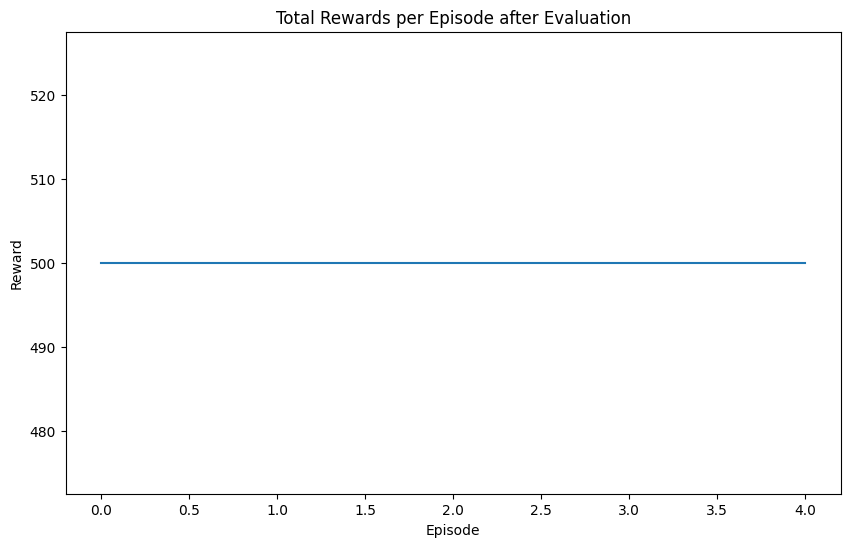


Average Reward over 5 Evaluation Episodes: 500.00


In [24]:
model_for_eval = DQNetwork(STATE_DIM, ACTION_DIM)
with open('eketha.pkl', 'rb') as f:
    model_weights = pickle.load(f)
    model_for_eval.load_state_dict(model_weights)
    model_for_eval.eval()
    # Evaluate the model with a step limit and proper termination
    num_eval_episodes = 5
    eval_rewards = []
    MAX_EVAL_STEPS = 500  # Maximum steps for evaluation to avoid infinite loop

    for episode in range(num_eval_episodes):
        state, _ = env.reset()
        episode_reward = 0

        for step in range(MAX_EVAL_STEPS):  # Explicit step limit
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = model_for_eval(state_tensor)
                action = torch.argmax(q_values).item()

            next_state, reward, done, _, _ = env.step(action)
            episode_reward += reward
            state = next_state

            if done:
                break  # End the episode if 'done' is True

        eval_rewards.append(episode_reward)

        # Plotting the Total Rewards per Episode after Evaluation
    plt.figure(figsize=(10, 6))
    plt.plot(eval_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Rewards per Episode after Evaluation')
    plt.show()

    avg_reward = np.mean(eval_rewards)
    print(f"\nAverage Reward over {num_eval_episodes} Evaluation Episodes: {avg_reward:.2f}")

 
    
    